In [100]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tinympc.tinympc_torch import *

In [102]:
# test case: double integrator
# mpc parameters
dt = 0.1
N = 100
num_envs = 3


A = torch.tensor([[1, dt], [0, 1]]).unsqueeze(0).repeat(num_envs,1,1)
B = torch.tensor([[0], [dt]]).unsqueeze(0).repeat(num_envs,1,1)
dyn = LinearDynamics(A,B)

Q = torch.eye(2).unsqueeze(0).repeat(num_envs,1,1)
R = torch.eye(1).unsqueeze(0).repeat(num_envs,1,1) * 0.05
Qf = torch.eye(2).unsqueeze(0).repeat(num_envs,1,1)
cost = LinearCost(Q, R, Qf)

xlb = torch.ones((2,1)).unsqueeze(0).repeat(num_envs,1,1) * -20
xub = torch.ones((2,1)).unsqueeze(0).repeat(num_envs,1,1) * 20
ulb = torch.ones((1,1)).unsqueeze(0).repeat(num_envs,1,1) * -1
uub = torch.ones((1,1)).unsqueeze(0).repeat(num_envs,1,1) * 1


constraints = LinearConstraints(xlb,xub,ulb,uub)

# solver
mpc = MPCSolver(dyn, cost, constraints, N, 0.001,num_envs,'cpu')



Kinf: 
 tensor([[[3.3977, 4.4562]],

        [[3.3977, 4.4562]],

        [[3.3977, 4.4562]]])
Pinf: 
 tensor([[[13.1254,  2.9453],
         [ 2.9453,  3.5682]],

        [[13.1254,  2.9453],
         [ 2.9453,  3.5682]],

        [[13.1254,  2.9453],
         [ 2.9453,  3.5682]]])


torch.Size([3, 2, 100])


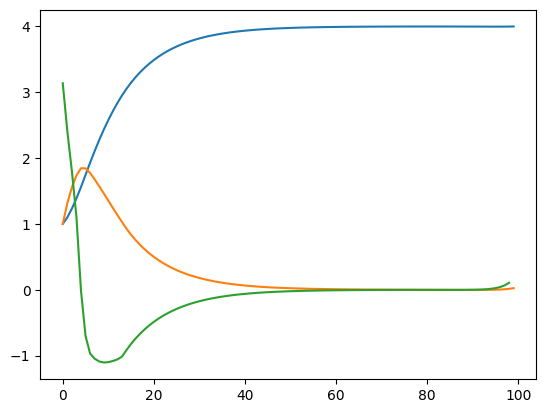

In [103]:

# reference trajectory and initial state
xref = np.zeros((2,N))+[[4],[0]]
x0 = np.array([[1],[1]])

xref =  torch.tensor(xref).unsqueeze(0).repeat(num_envs,1,1)
x0 = torch.tensor(x0).unsqueeze(0).repeat(num_envs,1,1)


mpc.solve(xref,x0)

print(mpc.x.shape)

plt.plot(mpc.x[1,0,:].numpy())
plt.plot(mpc.x[1,1,:].numpy())
plt.plot(mpc.u[1,0,:].numpy())

